In [2]:
import os

# Get the current working directory
current_path = os.getcwd()

# Assuming you have the filename
filename = "new_data_2023-10-07.txt"

# Create the full file path
file_path = os.path.join(current_path, "new_data_2023-10-07.txt")


In [3]:

# Read the content of the file
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Initialize a list to store each occurrence of lines starting from "Text"
text_occurrences = []

# Iterate through lines to find occurrences of "Text"
for line in lines:
    if "Text:" in line:
        # Create a new occurrence starting with the current line
        current_occurrence = [line]
    elif current_occurrence:
        # If an occurrence has started, append the line to it
        current_occurrence.append(line)
        if "להנחיות המלאות - https://www.oref.org.il/12761-he/Pakar.aspx" in line:
            # If the specified text is found, add the occurrence to the list
            text_occurrences.append(current_occurrence)
            # Reset the current occurrence
            current_occurrence = None
        elif  "להנחיות המלאות - https://www.oref.org.il/12754-he/Pakar.aspx" in line:
            # If the specified text is found, add the occurrence to the list
            text_occurrences.append(current_occurrence)
            # Reset the current occurrence
            current_occurrence = None

# Print the text occurrences
for i, occurrence in enumerate(text_occurrences):
    print(f"list[{i}] = {''.join(occurrence)}")


list[0] = Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**

**אזור לכיש**
פלמחים (דקה וחצי)

**אזור עוטף עזה**
יד מרדכי (15 שניות)
נתיב העשרה (15 שניות)

**אזור השפלה**
ראשון לציון - מערב (דקה וחצי)

**אזור דן**
בת-ים (דקה וחצי)

**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**
להנחיות המלאות - https://www.oref.org.il/12761-he/Pakar.aspx

list[1] = Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**

**אזור עוטף עזה**
נחל עוז (15 שניות)

**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**
להנחיות המלאות - https://www.oref.org.il/12761-he/Pakar.aspx

list[2] = Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**

**אזור עוטף עזה**
שדרות, איבים, ניר עם (15 שניות)
ארז (15 שניות)

**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**
להנחיות המלאות - https://www.oref.org.il/12761-he/Pakar.aspx

list[3] = Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**

**אזור לכיש**
אזור תעשייה קריית גת (45 שניות)
שדה משה (45 שניות)
קריית גת, כרמי גת (45 שניות)

**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**
להנחיות המלאות - https://www.oref.org

In [4]:
import pandas as pd
text_occurrences
# Initialize a list to store dictionaries for each occurrence
data_list = []

# Iterate through text_occurrences
for i, occurrence in enumerate(text_occurrences):
    # Combine the lines to form a single string
    occurrence_text = ''.join(occurrence)
    
    # Extract relevant information using regex or other methods
    # Here, I'm using a simple split based on newline characters
    lines = occurrence_text.split('\n')
    
    # Remove empty lines
    lines = [line.strip() for line in lines if line.strip()]

    # Create a dictionary with specific keys and values
    data_dict = {
        'Title': lines[0],  # Assuming the first line is the title
        # 'Area': lines[1],   # Assuming the third line is the area
        'Details': ', '.join(lines[1:-2]),  # Concatenate details excluding the last 2 lines
        'directive': lines[-2],
        'Instructions': lines[-1]  # Assuming the last line is instructions
    }
    
    # Append the dictionary to the list
    data_list.append(data_dict)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)

# Print the DataFrame
df

,Title,Details,directive,Instructions
0,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,"**אזור לכיש**, פלמחים (דקה וחצי), **אזור עוטף ...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...
1,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,"**אזור עוטף עזה**, נחל עוז (15 שניות)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...
2,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,"**אזור עוטף עזה**, שדרות, איבים, ניר עם (15 שנ...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...
3,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,"**אזור לכיש**, אזור תעשייה קריית גת (45 שניות)...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...
4,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,"**אזור עוטף עזה**, אור הנר (15 שניות), מטווח נ...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...
...,...,...,...,...
4214,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:17**,"**אזור קו העימות**, אביבים (מיידי), יראון (מיי...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...
4215,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:49**,"**אזור קו העימות**, צבעון (מיידי), **אזור גליל...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...
4216,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:49**,"**אזור קו העימות**, סאסא (מיידי)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...
4217,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:50**,"**אזור גליל עליון**, שפר (30 שניות)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...


create  type alert +date+time

In [5]:
import re
# Define a regex pattern to match Hebrew letters and spaces
pattern = re.compile("[א-ת ]+")

df['AlertType'] = df['Title'].astype(str).apply(lambda title: ' '.join(re.compile(r'[\u0590-\u05FF\s]+').findall(title)))

# Assuming df is your DataFrame

# Extract date and time from the 'Title' column using a regular expression
df[['Date', 'Time']] = df['Title'].str.extract(r'\[(.*?)\]\s(\d+:\d+)')

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


df['Month'] = df['Date'].dt.month_name()

# # Convert the 'Time' column to timedelta type
# df['Time'] = pd.to_timedelta(df['Time'] + ':00')

df.info()
df.tail(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4219 entries, 0 to 4218
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         4219 non-null   object        
 1   Details       4219 non-null   object        
 2   directive     4219 non-null   object        
 3   Instructions  4219 non-null   object        
 4   AlertType     4219 non-null   object        
 5   Date          4219 non-null   datetime64[ns]
 6   Time          4219 non-null   object        
 7   Month         4219 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 263.8+ KB


,Title,Details,directive,Instructions,AlertType,Date,Time,Month
4194,Text: ✈ **חדירת כלי טיס עוין [17/1/2024] 18:41**,"**אזור קו העימות**, אזור תעשייה רמת דלתון, כרם...","**היכנסו מיד למרחב המוגן ושהו בו למשך 10 דקות,...",להנחיות המלאות - https://www.oref.org.il/12754...,חדירת כלי טיס עוין,2024-01-17,18:41,January
4195,Text: ✈ **חדירת כלי טיס עוין [17/1/2024] 18:44**,"**אזור גליל עליון**, קדיתא, ספסופה - כפר חושן,...","**היכנסו מיד למרחב המוגן ושהו בו למשך 10 דקות,...",להנחיות המלאות - https://www.oref.org.il/12754...,חדירת כלי טיס עוין,2024-01-17,18:44,January
4196,Text: ✈ **חדירת כלי טיס עוין [17/1/2024] 18:44**,"**אזור גליל עליון**, מירון","**היכנסו מיד למרחב המוגן ושהו בו למשך 10 דקות,...",להנחיות המלאות - https://www.oref.org.il/12754...,חדירת כלי טיס עוין,2024-01-17,18:44,January
4197,Text: 🚨 **ירי רקטות וטילים [18/1/2024] 0:19**,"**אזור עוטף עזה**, חולית (15 שניות), יבול (15 ...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-18,0:19,January
4198,Text: 🚨 **ירי רקטות וטילים [18/1/2024] 13:32**,"**אזור אילת**, אילת (30 שניות)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-18,13:32,January
4199,Text: 🚨 **ירי רקטות וטילים [18/1/2024] 18:00**,"**אזור עוטף עזה**, ניר עוז (15 שניות), נירים (...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-18,18:00,January
4200,Text: 🚨 **ירי רקטות וטילים [18/1/2024] 20:31**,"**אזור גולן דרום**, יונתן (מיידי)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-18,20:31,January
4201,Text: 🚨 **ירי רקטות וטילים [18/1/2024] 21:02**,"**אזור עוטף עזה**, זמרת, שובה (15 שניות), כפר ...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-18,21:02,January
4202,Text: 🚨 **ירי רקטות וטילים [19/1/2024] 10:01**,"**אזור עוטף עזה**, נחל עוז (15 שניות)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-19,10:01,January
4203,Text: 🚨 **ירי רקטות וטילים [19/1/2024] 16:01**,"**אזור קו העימות**, ערב אל עראמשה (מיידי)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-19,16:01,January


new columons with the Area alerts
(to know later if alerts from North or Gaza)

In [6]:
# Extract all values next to the word "אזור" using regular expressions
matches = df['Details'].str.extractall(r'\*\*אזור\s(.*?)\*\*')

# Unstack the matches to create separate columns
df_names = matches.unstack().rename(columns=lambda x: f'Area{x + 1}')

# Rename the columns to "Area_1", "Area_2", etc.
df_names.columns = [f'Area_{i}' for i in range(1, len(df_names.columns) + 1)]

# Concatenate the new DataFrame with the original DataFrame
df = pd.concat([df, df_names], axis=1)

# Print the DataFrame
df

,Title,Details,directive,Instructions,AlertType,Date,Time,Month,Area_1,Area_2,Area_3,Area_4,Area_5,Area_6,Area_7,Area_8
0,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,"**אזור לכיש**, פלמחים (דקה וחצי), **אזור עוטף ...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2023-10-07,6:29,October,לכיש,עוטף עזה,השפלה,דן,NaN,NaN,NaN,NaN
1,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,"**אזור עוטף עזה**, נחל עוז (15 שניות)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2023-10-07,6:29,October,עוטף עזה,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,"**אזור עוטף עזה**, שדרות, איבים, ניר עם (15 שנ...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2023-10-07,6:29,October,עוטף עזה,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,"**אזור לכיש**, אזור תעשייה קריית גת (45 שניות)...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2023-10-07,6:29,October,לכיש,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,"**אזור עוטף עזה**, אור הנר (15 שניות), מטווח נ...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2023-10-07,6:29,October,עוטף עזה,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:17**,"**אזור קו העימות**, אביבים (מיידי), יראון (מיי...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-23,10:17,January,קו העימות,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4215,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:49**,"**אזור קו העימות**, צבעון (מיידי), **אזור גליל...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-23,10:49,January,קו העימות,גליל עליון,NaN,NaN,NaN,NaN,NaN,NaN
4216,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:49**,"**אזור קו העימות**, סאסא (מיידי)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-23,10:49,January,קו העימות,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4217,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:50**,"**אזור גליל עליון**, שפר (30 שניות)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-23,10:50,January,גליל עליון,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import numpy as np

# Assuming df is your DataFrame
area_columns = ['Area_1', 'Area_2', 'Area_3', 'Area_4', 'Area_5', 'Area_6', 'Area_7', 'Area_8']

# Flatten values from specified columns and convert to a set to remove duplicates
unique_values = set(np.concatenate([df[column].dropna().values for column in area_columns]))

# Create a string by joining the unique values
result_string = ', '.join(unique_values)
print(len(result_string))
print((result_string))

# Alerts_from_gaza = {"AlertGaze": ['השפלה', 'עוטף עזה', 'מערב לכיש', 'לכיש', 'שפלת יהודה', 'ירקון']}
Alerts_from_North = {"AlertNorth": ['קו העימות',
                                    'גולן דרום',
                                    'גליל תחתון','גולן צפון','גליל עליון','המפרץ'
                                    ]} 


# Create a new column "ShootArea" and check if values from Alerts_from_North appear in the specified columns
df['source_of_fire'] = np.where(df[area_columns].isin(Alerts_from_North["AlertNorth"]).any(axis=1), 'Hezbollah', 'Hamas')


# df.loc[df[area_columns].eq("אילת").any(axis=1), 'source_of_fire'] = 'Houthis_Yemen'

df


251
גליל עליון, מנשה, העמקים, מערב הנגב, מרכז הנגב, גליל תחתון, ערבה, בקעת בית שאן, מערב לכיש, ואדי ערה, גולן דרום, שפלת יהודה, קו העימות, דרום הנגב, ירקון, שרון, עוטף עזה, הכרמל, אילת, לכיש, דן, השפלה, מרכז הגליל, ירושלים, שומרון, המפרץ, גולן צפון, יהודה


,Title,Details,directive,Instructions,AlertType,Date,Time,Month,Area_1,Area_2,Area_3,Area_4,Area_5,Area_6,Area_7,Area_8,source_of_fire
0,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,"**אזור לכיש**, פלמחים (דקה וחצי), **אזור עוטף ...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2023-10-07,6:29,October,לכיש,עוטף עזה,השפלה,דן,NaN,NaN,NaN,NaN,Hamas
1,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,"**אזור עוטף עזה**, נחל עוז (15 שניות)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2023-10-07,6:29,October,עוטף עזה,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hamas
2,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,"**אזור עוטף עזה**, שדרות, איבים, ניר עם (15 שנ...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2023-10-07,6:29,October,עוטף עזה,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hamas
3,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,"**אזור לכיש**, אזור תעשייה קריית גת (45 שניות)...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2023-10-07,6:29,October,לכיש,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hamas
4,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,"**אזור עוטף עזה**, אור הנר (15 שניות), מטווח נ...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2023-10-07,6:29,October,עוטף עזה,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hamas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:17**,"**אזור קו העימות**, אביבים (מיידי), יראון (מיי...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-23,10:17,January,קו העימות,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hezbollah
4215,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:49**,"**אזור קו העימות**, צבעון (מיידי), **אזור גליל...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-23,10:49,January,קו העימות,גליל עליון,NaN,NaN,NaN,NaN,NaN,NaN,Hezbollah
4216,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:49**,"**אזור קו העימות**, סאסא (מיידי)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-23,10:49,January,קו העימות,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hezbollah
4217,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:50**,"**אזור גליל עליון**, שפר (30 שניות)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-23,10:50,January,גליל עליון,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hezbollah


In [8]:
# Remove text between "**" markers in the 'Details' column
df['Details'] = df['Details'].str.replace(r'\*\*(.*?)\*\*', '', regex=True)
df['Total_cities_with_alarm'] = df['Details'].str.split(',').apply(lambda x: len([element for element in x if element.strip()]))
df

,Title,Details,directive,Instructions,AlertType,Date,Time,Month,Area_1,Area_2,Area_3,Area_4,Area_5,Area_6,Area_7,Area_8,source_of_fire,Total_cities_with_alarm
0,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,", פלמחים (דקה וחצי), , יד מרדכי (15 שניות), נת...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2023-10-07,6:29,October,לכיש,עוטף עזה,השפלה,דן,NaN,NaN,NaN,NaN,Hamas,5
1,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,", נחל עוז (15 שניות)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2023-10-07,6:29,October,עוטף עזה,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hamas,1
2,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,", שדרות, איבים, ניר עם (15 שניות), ארז (15 שניות)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2023-10-07,6:29,October,עוטף עזה,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hamas,4
3,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,", אזור תעשייה קריית גת (45 שניות), שדה משה (45...",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2023-10-07,6:29,October,לכיש,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hamas,4
4,Text: 🚨 **ירי רקטות וטילים [7/10/2023] 6:29**,", אור הנר (15 שניות), מטווח ניר עם (15 שניות)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2023-10-07,6:29,October,עוטף עזה,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hamas,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:17**,", אביבים (מיידי), יראון (מיידי), ברעם (מיידי)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-23,10:17,January,קו העימות,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hezbollah,3
4215,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:49**,", צבעון (מיידי), , ספסופה - כפר חושן (30 שניות)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-23,10:49,January,קו העימות,גליל עליון,NaN,NaN,NaN,NaN,NaN,NaN,Hezbollah,2
4216,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:49**,", סאסא (מיידי)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-23,10:49,January,קו העימות,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hezbollah,1
4217,Text: 🚨 **ירי רקטות וטילים [23/1/2024] 10:50**,", שפר (30 שניות)",**היכנסו למרחב המוגן ושהו בו למשך 10 דקות.**,להנחיות המלאות - https://www.oref.org.il/12761...,ירי רקטות וטילים,2024-01-23,10:50,January,גליל עליון,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hezbollah,1


In [9]:
df.describe()


,Date,Total_cities_with_alarm
count,4219,4219.000000
mean,2023-10-28 09:56:36.918701056,3.165205
min,2023-10-07 00:00:00,1.000000
25%,2023-10-07 00:00:00,1.000000
50%,2023-10-14 00:00:00,2.000000
75%,2023-11-10 00:00:00,3.000000
max,2024-01-23 00:00:00,131.000000
std,NaN,4.805113


In [10]:
empty_columns = df.columns[df.isna().all()]
empty_columns


if len(empty_columns) > 0:
    print(f"The following columns are all empty: {', '.join(empty_columns)}")
else:
    print("No columns are all empty.")

No columns are all empty.


In [11]:
# Specify the columns to be dropped
columns_to_drop = ["Title", "directive", "Instructions"]

# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop)
df

,Details,AlertType,Date,Time,Month,Area_1,Area_2,Area_3,Area_4,Area_5,Area_6,Area_7,Area_8,source_of_fire,Total_cities_with_alarm
0,", פלמחים (דקה וחצי), , יד מרדכי (15 שניות), נת...",ירי רקטות וטילים,2023-10-07,6:29,October,לכיש,עוטף עזה,השפלה,דן,NaN,NaN,NaN,NaN,Hamas,5
1,", נחל עוז (15 שניות)",ירי רקטות וטילים,2023-10-07,6:29,October,עוטף עזה,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hamas,1
2,", שדרות, איבים, ניר עם (15 שניות), ארז (15 שניות)",ירי רקטות וטילים,2023-10-07,6:29,October,עוטף עזה,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hamas,4
3,", אזור תעשייה קריית גת (45 שניות), שדה משה (45...",ירי רקטות וטילים,2023-10-07,6:29,October,לכיש,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hamas,4
4,", אור הנר (15 שניות), מטווח ניר עם (15 שניות)",ירי רקטות וטילים,2023-10-07,6:29,October,עוטף עזה,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hamas,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,", אביבים (מיידי), יראון (מיידי), ברעם (מיידי)",ירי רקטות וטילים,2024-01-23,10:17,January,קו העימות,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hezbollah,3
4215,", צבעון (מיידי), , ספסופה - כפר חושן (30 שניות)",ירי רקטות וטילים,2024-01-23,10:49,January,קו העימות,גליל עליון,NaN,NaN,NaN,NaN,NaN,NaN,Hezbollah,2
4216,", סאסא (מיידי)",ירי רקטות וטילים,2024-01-23,10:49,January,קו העימות,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hezbollah,1
4217,", שפר (30 שניות)",ירי רקטות וטילים,2024-01-23,10:50,January,גליל עליון,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hezbollah,1


Dates where there were no alarms at all, (following a kidnapping deal)

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

# Generate a range of dates between the minimum and maximum dates in the DataFrame
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max())

# Identify missing dates
missing_dates = date_range[~date_range.isin(df['Date'])]

# Print or handle the missing dates as needed
print("Missing Dates:")
print(missing_dates)


Missing Dates:
DatetimeIndex(['2023-11-26', '2023-11-27', '2023-11-28', '2023-11-29'], dtype='datetime64[ns]', freq='D')


In [13]:
df['AlertType'] = df['AlertType'].replace({'ירי רקטות וטילים': 'rockets_and_missiles', 'חדירת כלי טיס עוין': 'hostile_aircraft'}, regex=True)


                        Creates several versions of a data frame for different relevant data

In [14]:
# version 1 - data without 7octber
without_07october_df=df[df['Date'] != '2023-10-07']

# # Version 2 - data of rockets by hamas
df['AlertType'] = df['AlertType'].str.strip()
rockets_and_missiles_df = df[df['AlertType'].eq('rockets_and_missiles')]

rockets_grouped_by_date = rockets_and_missiles_df.groupby(['Date','source_of_fire'])['Total_cities_with_alarm'].sum().reset_index()
print(f"rocket_group_by_date_with_7octber\n\n{print(rockets_grouped_by_date.describe())}")

rocket_grouped_without_07october = rockets_grouped_by_date[rockets_grouped_by_date['Date'] != '2023-10-07']
print(f"rocket_group_by_date_without_7octber\n{print(rocket_grouped_without_07october.describe())}")



                      Date  Total_cities_with_alarm
count                  189               189.000000
mean   2023-11-29 11:33:20                62.841270
min    2023-10-07 00:00:00                 1.000000
25%    2023-11-02 00:00:00                 4.000000
50%    2023-12-02 00:00:00                11.000000
75%    2023-12-27 00:00:00                40.000000
max    2024-01-23 00:00:00              4537.000000
std                    NaN               333.469489
rocket_group_by_date_with_7octber

None
                                Date  Total_cities_with_alarm
count                            188               188.000000
mean   2023-11-29 18:22:58.723404288                39.042553
min              2023-10-08 00:00:00                 1.000000
25%              2023-11-02 18:00:00                 4.000000
50%              2023-12-02 12:00:00                11.000000
75%              2023-12-27 06:00:00                39.250000
max              2024-01-23 00:00:00               384.000

#  Data visualization

Introduction to graphs:

1. Amount of alerts per month

2. The sum of the alarms that were every week since the beginning of the war

3. number of alerts by terrorist organization per Week

4. An analysis graph of the amount of alarms per day - for the purpose of checking if there were days without alarms (and if so, then why?)

5. number of alerts in the cities (by daily date) by each terrorist organization.

6. The type of alert common to any terrorist organization.

7. What is the most popular time for alarms?

8. The average of the  sum cities that have an alarm by time periods

9. What is the most popular time for alarms by terror organization?

10. Alarms due to rocket fire from Gaza (by daily date)



In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

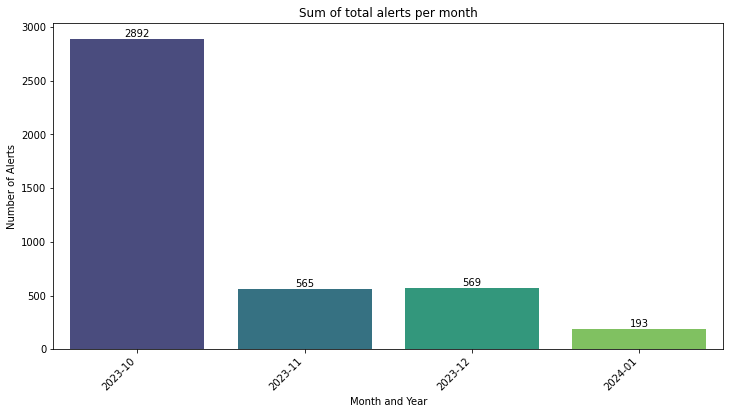

In [16]:
                                    #graph 1

# Extract the month and year from the 'Date' column and create a new 'MonthYear' column
df['MonthYear'] = df['Date'].dt.to_period("M")

# Count the number of occurrences for each month
monthly_counts = df['MonthYear'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, palette="viridis")
plt.xlabel("Month and Year")
plt.ylabel("Number of Alerts")
plt.title("Sum of total alerts per month")

# Display the counts above each bar
for i, count in enumerate(monthly_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

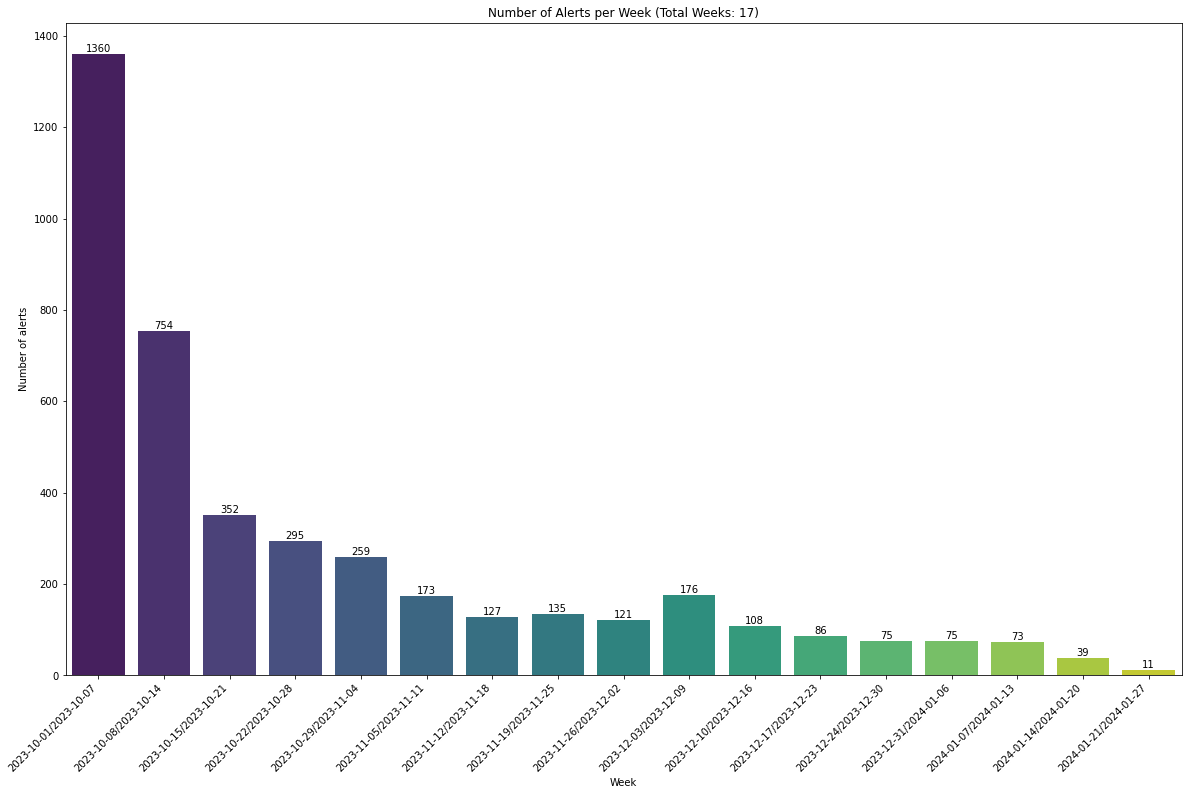

In [17]:
                                    #graph 2



# Extract the week from the 'Date' column and create a new 'Week' column
df['Week'] = df['Date'].dt.to_period("W-SAT")

# Count the number of occurrences for each week
weekly_counts = df['Week'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(20, 12))
sns.barplot(x=weekly_counts.index.astype(str), y=weekly_counts.values, palette="viridis")
plt.xlabel("Week")
plt.ylabel("Number of alerts")
plt.title(f"Number of Alerts per Week (Total Weeks: {len(weekly_counts)})")

# Display the counts above each bar
for i, count in enumerate(weekly_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


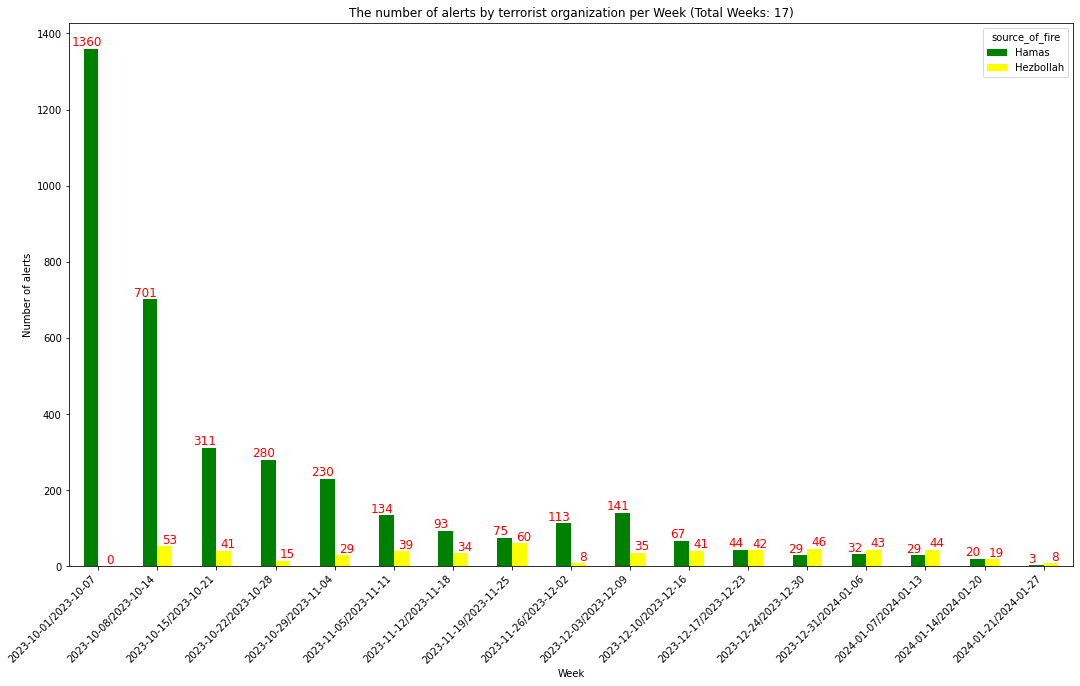

In [18]:
                                                                #Graph 3

# Extract the week from the 'Date' column and create a new 'Week' column
df['Week'] = df['Date'].dt.to_period("W-SAT")

# Count the number of occurrences for each week and source_of_fire
weekly_counts = df.groupby(['Week', 'source_of_fire']).size().unstack(fill_value=0)

# Plot the bar graph with yellow and green colors
plt.figure(figsize=(18, 10))
ax = weekly_counts.plot(kind='bar', color=['green', 'yellow'], ax=plt.gca(), stacked=False)

plt.xlabel("Week")
plt.ylabel("Number of alerts")
plt.title(f"The number of alerts by terrorist organization per Week (Total Weeks: {len(weekly_counts)})")

# Display the counts above each bar
for i, week in enumerate(weekly_counts.index):
    # Get the counts for the respective source_of_fire
    yellow_count = weekly_counts.loc[week, 'Hamas']
    green_count = weekly_counts.loc[week, 'Hezbollah']

    # Yellow label to the left of the yellow bar
    plt.text(i - 0.2, yellow_count + 0.1, str(yellow_count), ha='center', va='bottom', color='red', fontsize=12)

    # Green label to the right of the green bar
    plt.text(i + 0.2, green_count + 0.1, str(green_count), ha='center', va='bottom', color='red', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


You can see that there is an interval towards the beginning of December, where there was a kidnapping deal


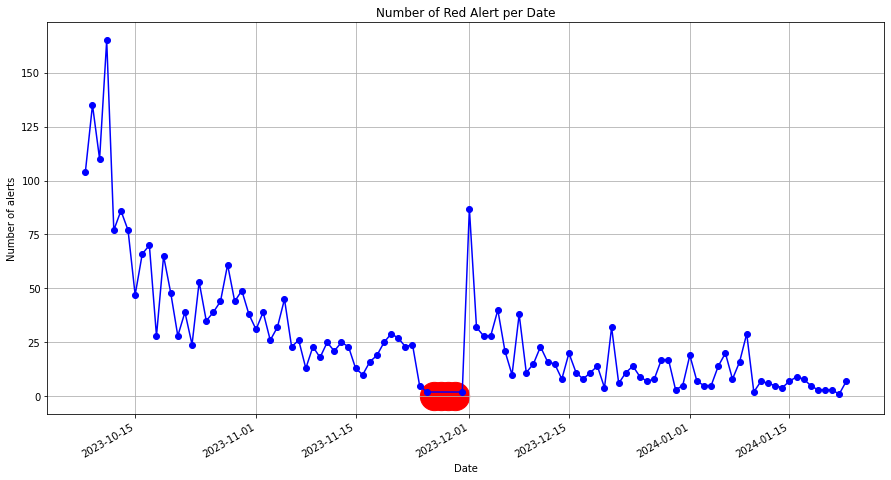

In [19]:
                                                #graph 4

print("You can see that there is an interval towards the beginning of December, where there was a kidnapping deal")

# # Sort the DataFrame by date
without_07october_df = without_07october_df.sort_values('Date')


# Group by date and count the number of lines for each date
lines_per_date = without_07october_df.groupby('Date').size()

# Plot the line graph with a larger figure size
plt.figure(figsize=(15, 8))
line_plot = lines_per_date.plot(kind='line', marker='o', color='blue')

# Highlight points where there are missing dates in red
for date in missing_dates:
    plt.scatter(date, 0, color='red', marker='o', s=800)

plt.title('Number of Red Alert per Date')
plt.xlabel('Date')
plt.ylabel('Number of alerts')
plt.grid(True)
plt.show()


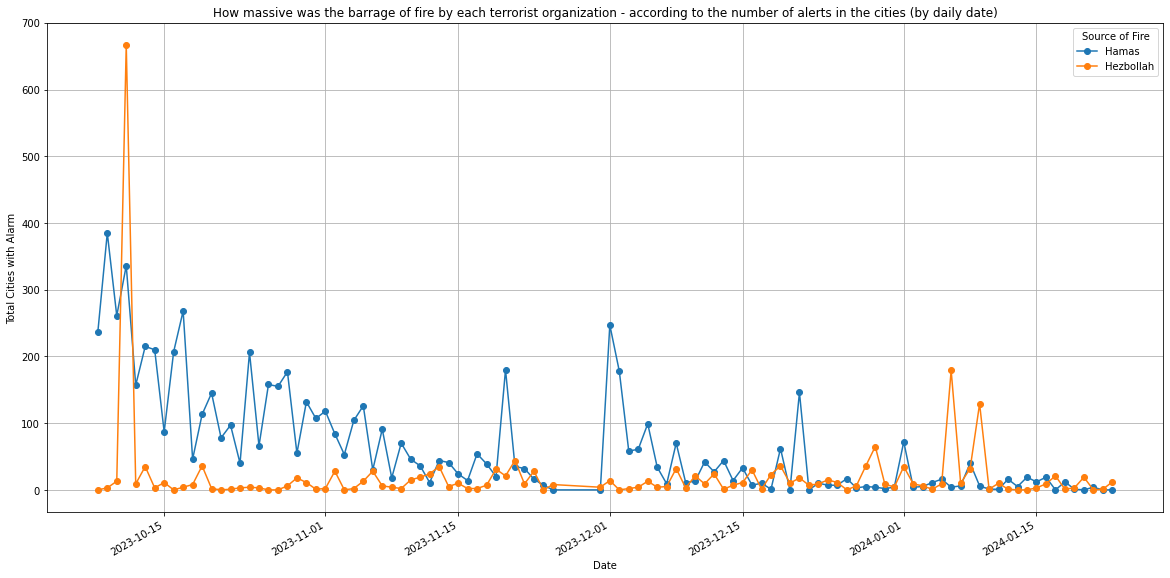

In [20]:


grouped_by_date_df = without_07october_df.groupby(['Date','source_of_fire'])['Total_cities_with_alarm'].sum().reset_index()

                                                                #Graph 5

# Pivot the DataFrame to create a multi-line graph
pivot_df = grouped_by_date_df.pivot(index='Date', columns='source_of_fire', values='Total_cities_with_alarm')

pivot_df = pivot_df.fillna(0)


# Create a figure with subplots
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the multi-line graph
pivot_df.plot(marker='o', ax=ax)

plt.title('How massive was the barrage of fire by each terrorist organization - according to the number of alerts in the cities (by daily date)') # Sum the total cities with alram

plt.xlabel('Date')
plt.ylabel('Total Cities with Alarm')
plt.legend(title='Source of Fire')
plt.grid(True)
plt.show()



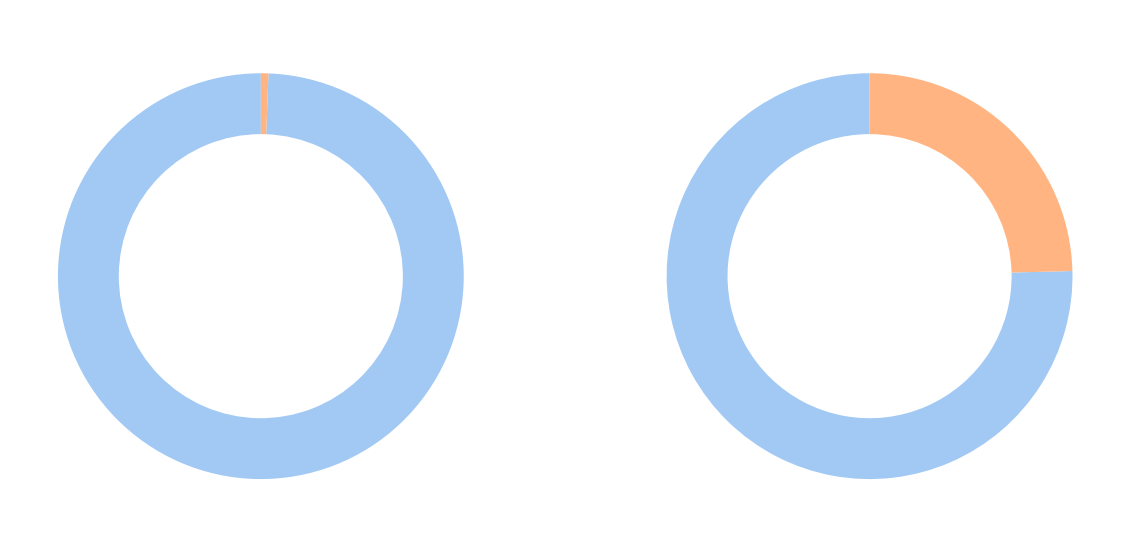

In [21]:
                                                                #Graph 6


# Get unique values in the 'source_of_fire' column
unique_sources = df['source_of_fire'].unique()

# Set a seaborn color palette
sns.set_palette("pastel")

# Create subplots for each unique source_of_fire
fig, axs = plt.subplots(1, len(unique_sources), figsize=(20, 20))

# Iterate over unique sources and create a pie chart for each
for i, source in enumerate(unique_sources):
    source_df = df[df['source_of_fire'] == source]
    alert_type_counts = source_df['AlertType'].value_counts()
    
    axs[i].pie(alert_type_counts, labels=alert_type_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3),textprops={'color': 'white'})
    axs[i].set_title(f'{source} - AlertType Distribution', color='white')

    # axs[i].set_title(f'{source} - AlertType Distribution')

plt.show()


C:\Users\omrid\AppData\Local\Temp/ipykernel_14944/4017753828.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


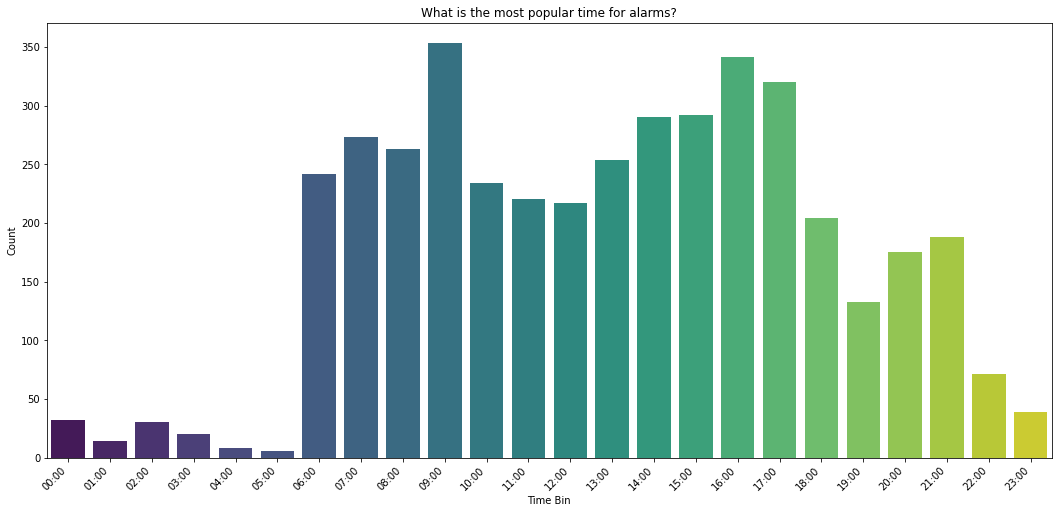

TimeBin
09:00    353
16:00    341
17:00    320
15:00    292
14:00    290
07:00    273
08:00    263
13:00    254
06:00    242
10:00    234
11:00    220
12:00    217
18:00    204
21:00    188
20:00    175
19:00    133
22:00     71
23:00     39
00:00     32
02:00     30
03:00     20
01:00     14
04:00      8
05:00      6
Name: count, dtype: int64

In [22]:
                                                                #Graph 7

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Create a new column for time bins with 1-hour intervals, only displaying the hour
df['TimeBin'] = df['Time'].dt.strftime('%H:00')


# Sort the DataFrame by 'TimeBin'
df = df.sort_values(by='TimeBin')

# Plot the count of each time bin using seaborn
plt.figure(figsize=(18, 8))
sns.countplot(x='TimeBin', data=df, palette='viridis')
plt.title('What is the most popular time for alarms?')
plt.xlabel('Time Bin')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

df.TimeBin.value_counts()


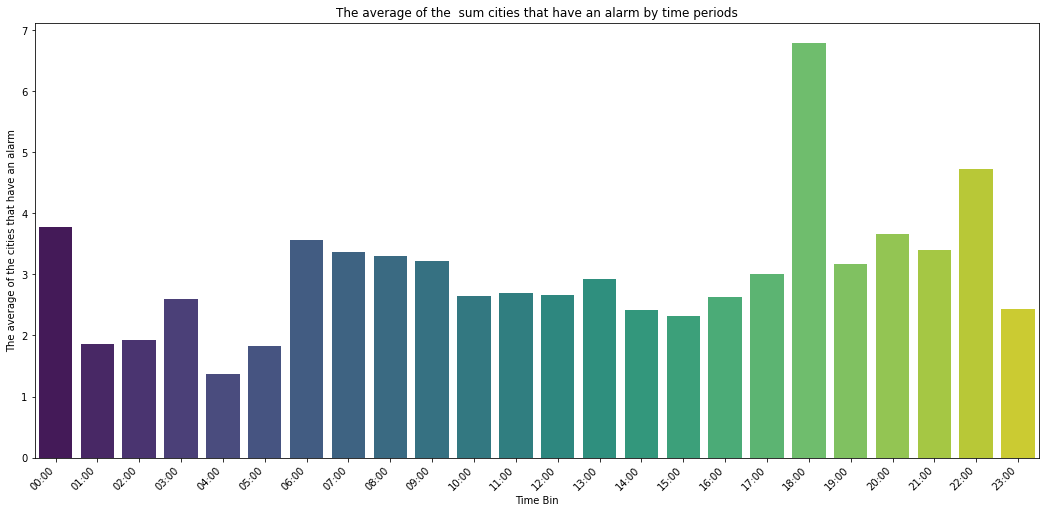

,TimeBin,Total_cities_with_alarm
0,00:00,3.781250
1,01:00,1.857143
2,02:00,1.933333
3,03:00,2.600000
4,04:00,1.375000
5,05:00,1.833333
6,06:00,3.561983
7,07:00,3.362637
8,08:00,3.307985
9,09:00,3.226629


In [23]:
                                                                #Graph 8

# Group by 'TimeBin' and sum 'Total_cities_with_alarm' within each time bin
sum_per_time_bin = df.groupby('TimeBin')['Total_cities_with_alarm'].mean().reset_index()

# Plot the sum of 'Total_cities_with_alarm' for each time bin using seaborn
plt.figure(figsize=(18, 8))
sns.barplot(x='TimeBin', y='Total_cities_with_alarm', data=sum_per_time_bin, palette='viridis')
plt.title('The average of the  sum cities that have an alarm by time periods')
plt.xlabel('Time Bin')
plt.ylabel('The average of the cities that have an alarm')
plt.xticks(rotation=45, ha='right')
plt.show()


sum_per_time_bin


In [24]:
most_common_time = df['TimeBin'].value_counts().idxmax()

max_time_bin = df.loc[df['Total_cities_with_alarm'].idxmax(), 'TimeBin']
average_alarms_max_time_bin = df.groupby('TimeBin')['Total_cities_with_alarm'].mean().loc[max_time_bin]


print(f"Can see that the most common time for alarms is at {most_common_time}")
print(f"On average at {max_time_bin}, there are the most alarms for the most cities, about {average_alarms_max_time_bin:.2f} cities on average")



Can see that the most common time for alarms is at 09:00
On average at 18:00, there are the most alarms for the most cities, about 6.78 cities on average


<Figure size 1296x576 with 0 Axes>

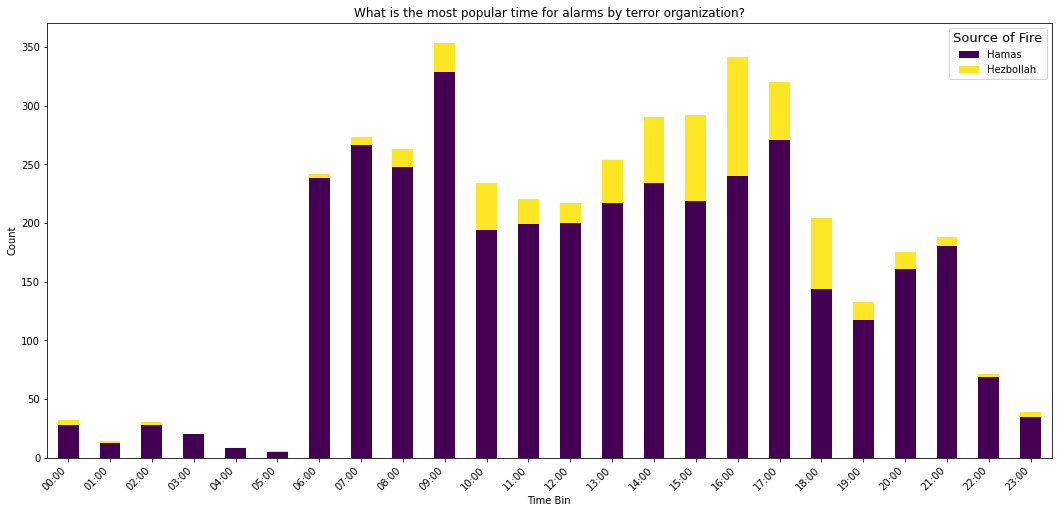

In [25]:
                                                                #Graph 9

# Create a DataFrame with counts of each time bin by 'source_of_fire'
count_per_time_bin_source = df.groupby(['TimeBin', 'source_of_fire']).size().unstack(fill_value=0)

# Plot the stacked barplot by unique values of 'source_of_fire'
plt.figure(figsize=(18, 8))
count_per_time_bin_source.plot(kind='bar', stacked=True, colormap='viridis', figsize=(18, 8))
plt.title('What is the most popular time for alarms by terror organization?')
plt.xlabel('Time Bin')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Source of Fire', title_fontsize='13')
plt.show()


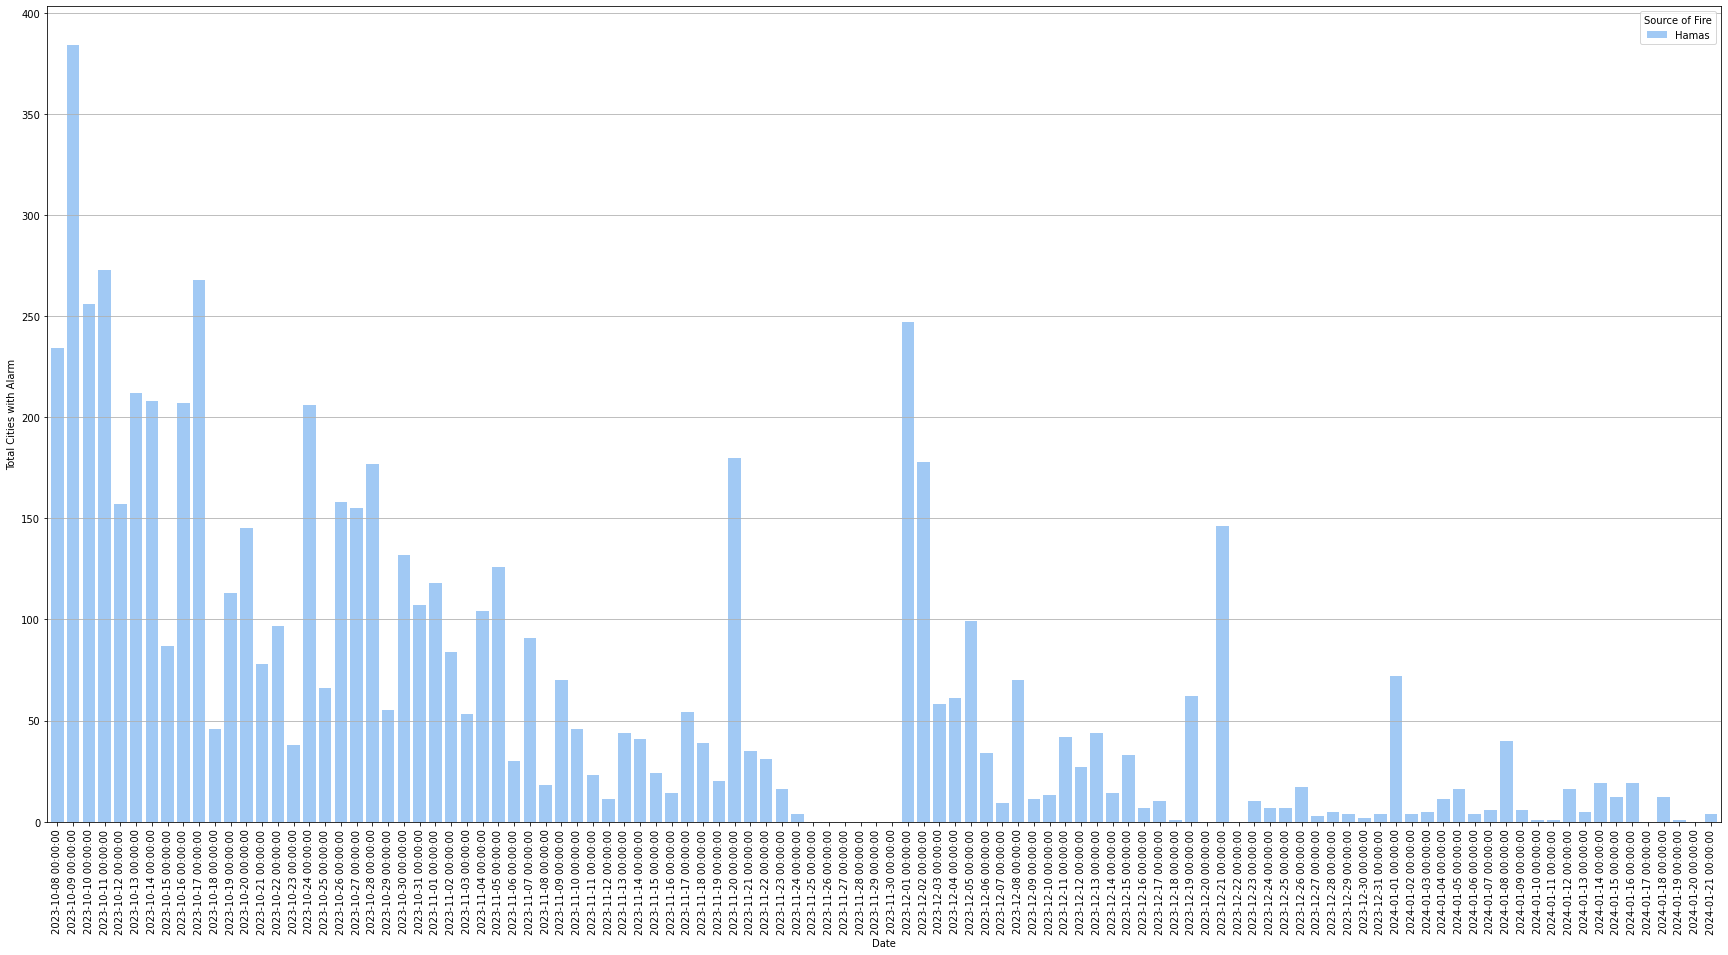

In [26]:
                                                                #Graph 10
import matplotlib.pyplot as plt

# Assuming hamas_data is your DataFrame
hamas_data = rocket_grouped_without_07october[rocket_grouped_without_07october['source_of_fire'] == 'Hamas']

# Copy the data to avoid SettingWithCopyWarning
hamas_data = hamas_data.copy()

# Convert the 'Date' column to datetime type if not already
hamas_data['Date'] = pd.to_datetime(hamas_data['Date'])

# Extract only the date part from the 'Date' column
hamas_data['Date'] = hamas_data['Date'].dt.date

# Pivot the DataFrame to create a multi-bar graph
pivot_df = hamas_data.pivot(index='Date', columns='source_of_fire', values='Total_cities_with_alarm')
pivot_df = pivot_df.fillna(0)

# Check for missing dates and fill with 0
all_dates = pd.date_range(start=pivot_df.index.min(), end=pivot_df.index.max(), freq='D')
pivot_df = pivot_df.reindex(all_dates, fill_value=0)

# Calculate the sum of total days
total_days = len(pivot_df.index)

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(30, 15))

# Plot the multi-bar graph
pivot_df.plot(kind='bar', ax=ax, width=0.8)

plt.title(f'Alarms due to rocket fire from Hamas (by daily date)\nTotal Days: {total_days}\n without 7 October data')
plt.title(f'')

plt.xlabel('Date')
plt.ylabel('Total Cities with Alarm')
plt.legend(title='Source of Fire')
plt.grid(axis='y')
plt.show()


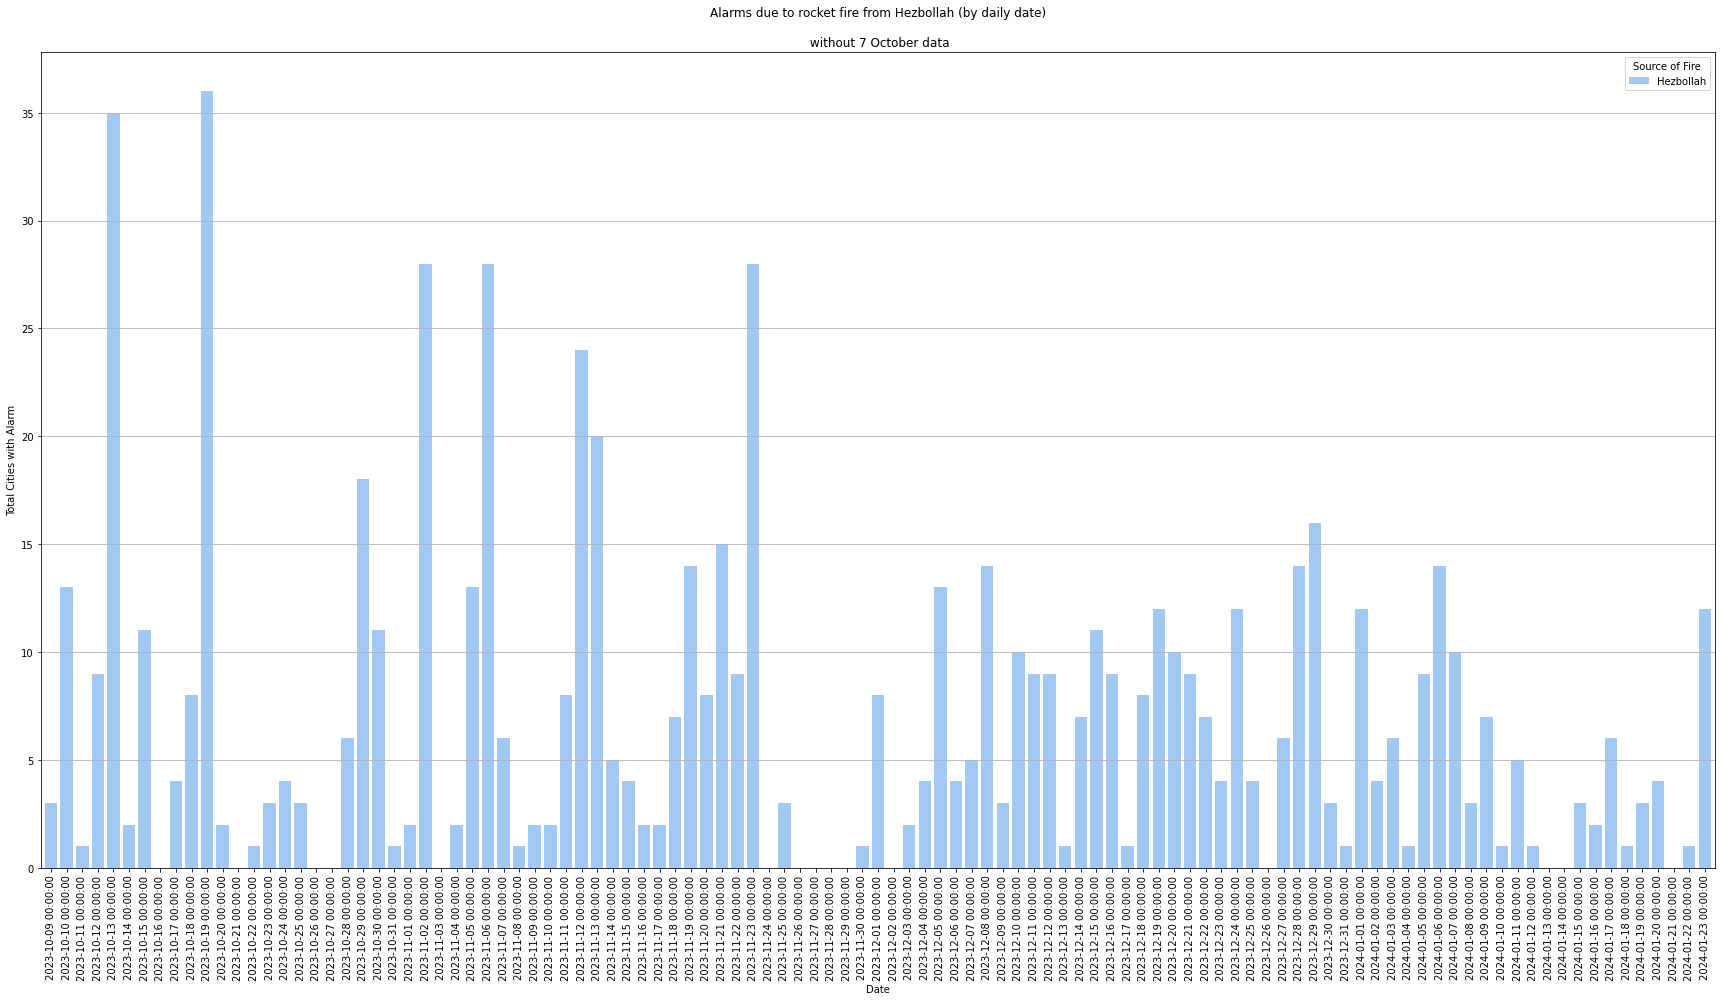

In [27]:
                                                                #Graph 11

Hezbollah_data = rocket_grouped_without_07october[rocket_grouped_without_07october['source_of_fire'] == 'Hezbollah']

# Copy the data to avoid SettingWithCopyWarning
Hezbollah_data = Hezbollah_data.copy()

# Convert the 'Date' column to datetime type if not already
Hezbollah_data['Date'] = pd.to_datetime(Hezbollah_data['Date'])

# Extract only the date part from the 'Date' column
Hezbollah_data['Date'] = Hezbollah_data['Date'].dt.date

# Pivot the DataFrame to create a multi-bar graph
pivot_df = Hezbollah_data.pivot(index='Date', columns='source_of_fire', values='Total_cities_with_alarm')
pivot_df = pivot_df.fillna(0)

# Check for missing dates and fill with 0
all_dates = pd.date_range(start=pivot_df.index.min(), end=pivot_df.index.max(), freq='D')
pivot_df = pivot_df.reindex(all_dates, fill_value=0)

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(30, 15))

# Plot the multi-bar graph
pivot_df.plot(kind='bar', ax=ax, width=0.8)

plt.title(f'Alarms due to rocket fire from Hezbollah (by daily date)\n\n without 7 October data')

plt.xlabel('Date')
plt.ylabel('Total Cities with Alarm')
plt.legend(title='Source of Fire')
plt.grid(axis='y')
plt.show()
